# 1-1,ÁªìÊûÑÂåñÊï∞ÊçÆÂª∫Ê®°ÊµÅÁ®ãËåÉ‰æã

In [33]:
import os

#macÁ≥ªÁªü‰∏äpytorchÂíåmatplotlibÂú®jupyter‰∏≠ÂêåÊó∂Ë∑ëÈúÄË¶ÅÊõ¥ÊîπÁéØÂ¢ÉÂèòÈáè
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


In [34]:
!pip install torch
!pip install -U torchkeras

In [35]:
import torch
import torchkeras

print("torch.__version__ = ", torch.__version__)
print("torchkeras.__version__ = ", torchkeras.__version__)

torch.__version__ =  2.0.1
torchkeras.__version__ =  3.9.3


### ‰∏ÄÔºåÂáÜÂ§áÊï∞ÊçÆ

titanicÊï∞ÊçÆÈõÜÁöÑÁõÆÊ†áÊòØÊ†πÊçÆ‰πòÂÆ¢‰ø°ÊÅØÈ¢ÑÊµã‰ªñ‰ª¨Âú®TitanicÂè∑ÊíûÂáªÂÜ∞Â±±Ê≤âÊ≤°ÂêéËÉΩÂê¶ÁîüÂ≠ò„ÄÇ

ÁªìÊûÑÂåñÊï∞ÊçÆ‰∏ÄËà¨‰ºö‰ΩøÁî®Pandas‰∏≠ÁöÑDataFrameËøõË°åÈ¢ÑÂ§ÑÁêÜ„ÄÇ


In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch 
from torch import nn # ÂØºÂÖ•Á•ûÁªèÁΩëÁªúÂåÖ
from torch.utils.data import Dataset,DataLoader,TensorDataset

dftrain_raw = pd.read_csv('./eat_pytorch_datasets/titanic/train.csv')
dftest_raw = pd.read_csv('./eat_pytorch_datasets/titanic/test.csv')
dftrain_raw.head(10)

PassengerId  Survived  Pclass  \
0          493         0       1   
1           53         1       1   
2          388         1       2   
3          192         0       2   
4          687         0       3   
5           16         1       2   
6          228         0       3   
7          884         0       2   
8          168         0       3   
9          752         1       3   

                                              Name     Sex   Age  SibSp  \
0                       Molson, Mr. Harry Markland    male  55.0      0   
1         Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
2                                 Buss, Miss. Kate  female  36.0      0   
3                            Carbines, Mr. William    male  19.0      0   
4                         Panula, Mr. Jaako Arnold    male  14.0      4   
5                 Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
6                  Lovell, Mr. John Hall ("Henry")    male  20.5      0   
7                    Banfield, Mr. Frederick James    male  28.0      0   
8  Skoog, Mrs. William (Anna Bernhardina Karlsson)  female  45.0      1   
9                              Moor, Master. Meier    male   6.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0            113787  30.5000   C30        S  
1      0          PC 17572  76.7292   D33        C  
2      0             27849  13.0000   NaN        S  
3      0             28424  13.0000   NaN        S  
4      1           3101295  39.6875   NaN        S  
5      0            248706  16.0000   NaN        S  
6      0         A/5 21173   7.2500   NaN        S  
7      0  C.A./SOTON 34068  10.5000   NaN        S  
8      4            347088  27.9000   NaN        S  
9      1            392096  12.4750  E121        S

Â≠óÊÆµËØ¥ÊòéÔºö

* Survived:0‰ª£Ë°®Ê≠ª‰∫°Ôºå1‰ª£Ë°®Â≠òÊ¥ª„ÄêyÊ†áÁ≠æ„Äë
* Pclass:‰πòÂÆ¢ÊâÄÊåÅÁ•®Á±ªÔºåÊúâ‰∏âÁßçÂÄº(1,2,3) „ÄêËΩ¨Êç¢ÊàêonehotÁºñÁ†Å„Äë
* Name:‰πòÂÆ¢ÂßìÂêç „ÄêËàçÂéª„Äë
* Sex:‰πòÂÆ¢ÊÄßÂà´ „ÄêËΩ¨Êç¢ÊàêboolÁâπÂæÅ„Äë
* Age:‰πòÂÆ¢Âπ¥ÈæÑ(ÊúâÁº∫Â§±) „ÄêÊï∞ÂÄºÁâπÂæÅÔºåÊ∑ªÂä†‚ÄúÂπ¥ÈæÑÊòØÂê¶Áº∫Â§±‚Äù‰Ωú‰∏∫ËæÖÂä©ÁâπÂæÅ„Äë
* SibSp:‰πòÂÆ¢ÂÖÑÂºüÂßêÂ¶π/ÈÖçÂÅ∂ÁöÑ‰∏™Êï∞(Êï¥Êï∞ÂÄº) „ÄêÊï∞ÂÄºÁâπÂæÅ„Äë
* Parch:‰πòÂÆ¢Áà∂ÊØç/Â≠©Â≠êÁöÑ‰∏™Êï∞(Êï¥Êï∞ÂÄº)„ÄêÊï∞ÂÄºÁâπÂæÅ„Äë
* Ticket:Á•®Âè∑(Â≠óÁ¨¶‰∏≤)„ÄêËàçÂéª„Äë
* Fare:‰πòÂÆ¢ÊâÄÊåÅÁ•®ÁöÑ‰ª∑Ê†º(ÊµÆÁÇπÊï∞Ôºå0-500‰∏çÁ≠â) „ÄêÊï∞ÂÄºÁâπÂæÅ„Äë
* Cabin:‰πòÂÆ¢ÊâÄÂú®ËàπËà±(ÊúâÁº∫Â§±) „ÄêÊ∑ªÂä†‚ÄúÊâÄÂú®ËàπËà±ÊòØÂê¶Áº∫Â§±‚Äù‰Ωú‰∏∫ËæÖÂä©ÁâπÂæÅ„Äë
* Embarked:‰πòÂÆ¢ÁôªËàπÊ∏ØÂè£:S„ÄÅC„ÄÅQ(ÊúâÁº∫Â§±)„ÄêËΩ¨Êç¢ÊàêonehotÁºñÁ†ÅÔºåÂõõÁª¥Â∫¶ S,C,Q,nan„Äë


Âà©Áî®PandasÁöÑÊï∞ÊçÆÂèØËßÜÂåñÂäüËÉΩÊàë‰ª¨ÂèØ‰ª•ÁÆÄÂçïÂú∞ËøõË°åÊé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûêEDAÔºàExploratory Data AnalysisÔºâ„ÄÇ

labelÂàÜÂ∏ÉÊÉÖÂÜµ

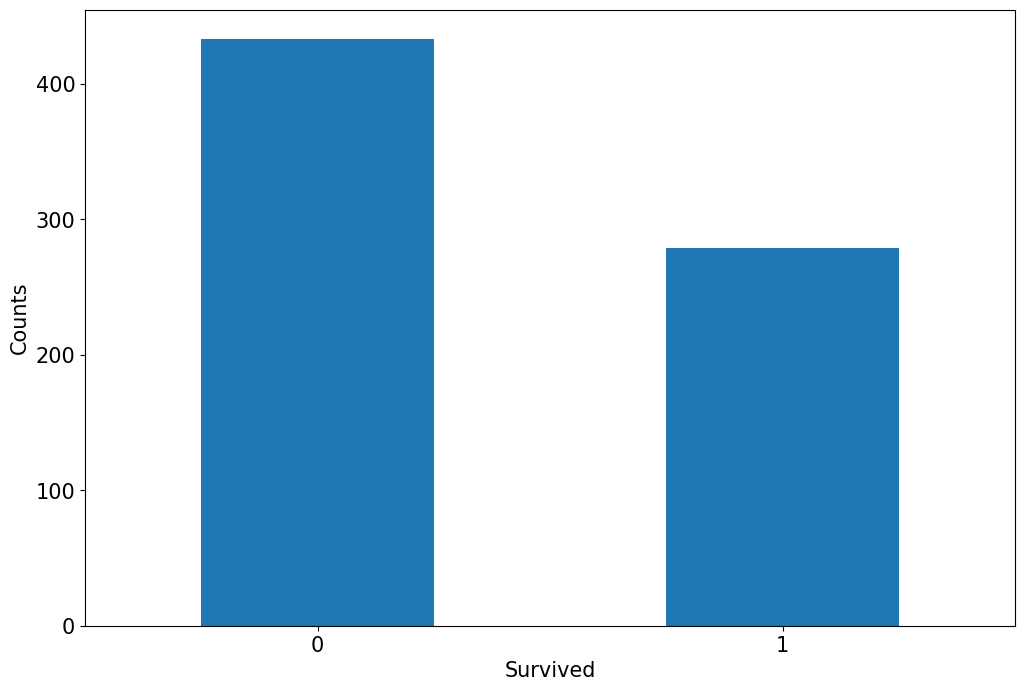

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# ‰ªéDataFrame‰∏≠Ëé∑Âèñ'Survived'ÂàóÁöÑÂÄºËÆ°Êï∞ÔºåÂπ∂ÁªòÂà∂Êü±Áä∂Âõæ
# kind='bar'Ë°®Á§∫ÁªòÂà∂Êü±Áä∂ÂõæÔºåfigsize=(12, 8)ËÆæÁΩÆÂõæÂΩ¢Â§ßÂ∞èÔºåfontsize=15ËÆæÁΩÆÂ≠ó‰ΩìÂ§ßÂ∞èÔºårot=0Ë°®Á§∫‰∏çÊóãËΩ¨XËΩ¥Ê†áÁ≠æ
ax = dftrain_raw['Survived'].value_counts().plot(kind='bar',
                                                 figsize=(12, 8), fontsize=15, rot=0)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Survived', fontsize=15)
plt.show()


Âπ¥ÈæÑÂàÜÂ∏ÉÊÉÖÂÜµ

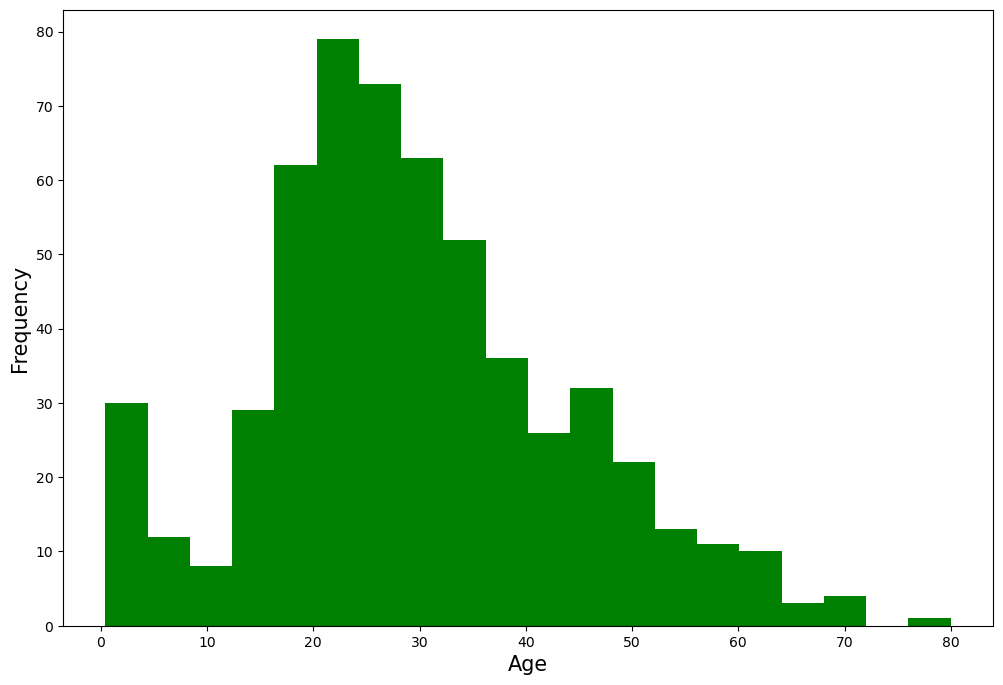

In [38]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

# ‰ªéÊï∞ÊçÆÊ°ÜÔºàDataFrameÔºâ‰∏≠ÈÄâÊã© 'Age' ÂàóÔºåÂπ∂ÁªòÂà∂Áõ¥ÊñπÂõæ
ax = dftrain_raw['Age'].plot(kind='hist',  # ‰ΩøÁî®Áõ¥ÊñπÂõæÁªòÂà∂
                             bins=20,  # Â∞ÜÊï∞ÊçÆÂàÜÊàê20‰∏™Âå∫Èó¥
                             color='green',  # ËÆæÁΩÆÁõ¥ÊñπÂõæÁöÑÈ¢úËâ≤‰∏∫Á¥´Ëâ≤
                             figsize=(12, 8),  # ËÆæÁΩÆÂõæÁöÑÂ∞∫ÂØ∏‰∏∫12x8Ëã±ÂØ∏
                             fontsize=10)  # ËÆæÁΩÆÂ≠ó‰ΩìÂ§ßÂ∞è‰∏∫15

# ËÆæÁΩÆyËΩ¥Ê†áÁ≠æ
ax.set_ylabel('Frequency', fontsize=15)  # ËÆæÁΩÆyËΩ¥Ê†áÁ≠æ‰∏∫'Frequency'ÔºåÂ≠ó‰ΩìÂ§ßÂ∞è‰∏∫15

# ËÆæÁΩÆxËΩ¥Ê†áÁ≠æ
ax.set_xlabel('Age', fontsize=15)  # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æ‰∏∫'Age'ÔºåÂ≠ó‰ΩìÂ§ßÂ∞è‰∏∫15

# ÊòæÁ§∫ÁªòÂà∂ÁöÑÂõæÂΩ¢
plt.show()

Âπ¥ÈæÑÂíålabelÁöÑÁõ∏ÂÖ≥ÊÄß

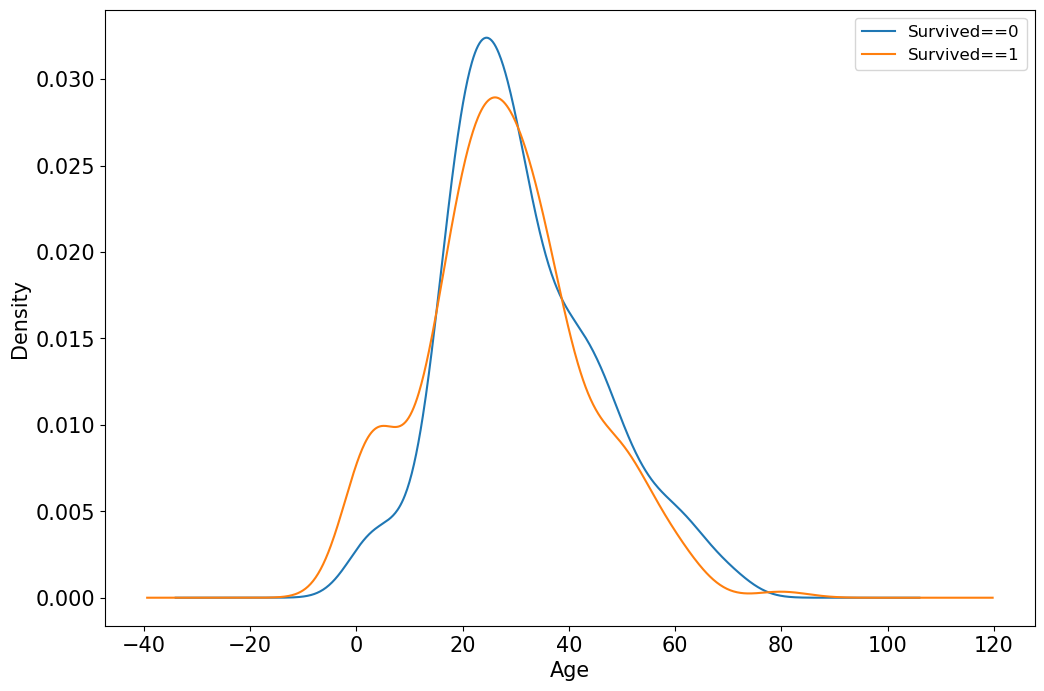

In [39]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

# ‰ªéÊï∞ÊçÆÊ°ÜÔºàDataFrameÔºâ‰∏≠Á≠õÈÄâ 'Survived' ÂàóÁ≠â‰∫é 0 ÁöÑÊï∞ÊçÆÔºåÂπ∂ÁªòÂà∂Âπ¥ÈæÑÔºà'Age'ÔºâÁöÑÂØÜÂ∫¶Âõæ
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind='density',  # ‰ΩøÁî®ÂØÜÂ∫¶ÂõæÁªòÂà∂
                                                    figsize=(12, 8),  # ËÆæÁΩÆÂõæÁöÑÂ∞∫ÂØ∏‰∏∫12x8Ëã±ÂØ∏
                                                    fontsize=15)  # ËÆæÁΩÆÂ≠ó‰ΩìÂ§ßÂ∞è‰∏∫15

# ‰ªéÊï∞ÊçÆÊ°Ü‰∏≠Á≠õÈÄâ 'Survived' ÂàóÁ≠â‰∫é 1 ÁöÑÊï∞ÊçÆÔºåÂπ∂ÁªòÂà∂Âπ¥ÈæÑÁöÑÂØÜÂ∫¶Âõæ
dftrain_raw.query('Survived == 1')['Age'].plot(kind='density',  # ‰ΩøÁî®ÂØÜÂ∫¶ÂõæÁªòÂà∂
                                               figsize=(12, 8),  # ËÆæÁΩÆÂõæÁöÑÂ∞∫ÂØ∏‰∏∫12x8Ëã±ÂØ∏
                                               fontsize=15)  # ËÆæÁΩÆÂ≠ó‰ΩìÂ§ßÂ∞è‰∏∫15

# Ê∑ªÂä†Âõæ‰æãÔºåÁî®‰∫éÂå∫ÂàÜ Survived==0 Âíå Survived==1 ÁöÑÂØÜÂ∫¶Âõæ
ax.legend(['Survived==0', 'Survived==1'], fontsize=12)

# ËÆæÁΩÆyËΩ¥Ê†áÁ≠æ
ax.set_ylabel('Density', fontsize=15)  # ËÆæÁΩÆyËΩ¥Ê†áÁ≠æ‰∏∫'Density'ÔºåÂ≠ó‰ΩìÂ§ßÂ∞è‰∏∫15

# ËÆæÁΩÆxËΩ¥Ê†áÁ≠æ
ax.set_xlabel('Age', fontsize=15)  # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æ‰∏∫'Age'ÔºåÂ≠ó‰ΩìÂ§ßÂ∞è‰∏∫15

# ÊòæÁ§∫ÁªòÂà∂ÁöÑÂõæÂΩ¢
plt.show()

**‰∏ãÈù¢‰∏∫Ê≠£ÂºèÁöÑÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ**

1. `dfPclass = pd.get_dummies(dfdata['Pclass'])`Ôºö
   - `pd.get_dummies` ÊòØ Pandas Â∫ì‰∏≠ÁöÑ‰∏Ä‰∏™ÂáΩÊï∞ÔºåÁî®‰∫éËøõË°åÁã¨ÁÉ≠ÁºñÁ†Å„ÄÇÂÆÉÂ∞ÜÂÖ∑ÊúâÂ§ö‰∏™‰∏çÂêåÂèñÂÄºÁöÑÂàÜÁ±ªÂèòÈáèÔºàÂ¶Ç 'Pclass' ÂàóÔºâËΩ¨Êç¢‰∏∫Â§ö‰∏™‰∫åËøõÂà∂Ôºà0Êàñ1ÔºâÁöÑÂàóÔºå‰ª•‰æøÊõ¥Â•ΩÂú∞Áî®‰∫éÊú∫Âô®Â≠¶‰π†Ê®°Âûã„ÄÇ
   - `dfdata['Pclass']` Ë°®Á§∫‰ªéÂêç‰∏∫ `dfdata` ÁöÑÊï∞ÊçÆÊ°Ü‰∏≠ÈÄâÊã© 'Pclass' ÂàóÔºåÂπ∂Â∞ÜÂÖ∂‰º†ÈÄíÁªô `pd.get_dummies` ÂáΩÊï∞„ÄÇ
   - ÁªìÊûúÊòØ‰∏Ä‰∏™ÂåÖÂê´Áã¨ÁÉ≠ÁºñÁ†ÅÂêéÊï∞ÊçÆÁöÑÊñ∞Êï∞ÊçÆÊ°Ü `dfPclass`„ÄÇ

2. `dfPclass.columns = ['Pclass_' + str(x) for x in dfPclass.columns]`Ôºö
   - Ëøô‰∏ÄË°å‰ª£Á†ÅÁî®‰∫éÊõ¥Êîπ `dfPclass` Êï∞ÊçÆÊ°ÜÁöÑÂàóÂêç„ÄÇ
   - `dfPclass.columns` ËøîÂõû `dfPclass` Êï∞ÊçÆÊ°ÜÁöÑÂàóÊ†áÁ≠æ„ÄÇ
   - `['Pclass_' + str(x) for x in dfPclass.columns]` ÊòØ‰∏Ä‰∏™ÂàóË°®Êé®ÂØºÂºèÔºåÁî®‰∫éÂ∞ÜÊØè‰∏™ÂàóÊ†áÁ≠æÈÉΩ‰øÆÊîπ‰∏∫‰ª• 'Pclass_' ‰Ωú‰∏∫ÂâçÁºÄÔºå‰ª•‰æøÊõ¥Â•ΩÂú∞Ê†áËØÜËøô‰∫õÂàó„ÄÇ

3. `dfresult = pd.concat([dfresult, dfPclass], axis=1)`Ôºö
   - Ëøô‰∏ÄË°å‰ª£Á†Å‰ΩøÁî® `pd.concat` ÂáΩÊï∞Â∞Ü `dfPclass` Êï∞ÊçÆÊ°Ü‰∏é‰πãÂâçÁöÑÁªìÊûúÊï∞ÊçÆÊ°Ü `dfresult` Ê∞¥Âπ≥ËøûÊé•ÔºàÊåâÂàóËøûÊé•Ôºâ„ÄÇ
   - `axis=1` ÂèÇÊï∞Ë°®Á§∫ÊåâÂàóËøûÊé•ÔºåÂõ†Ê≠§Â∞Ü `dfPclass` ÁöÑÂàóÊ∑ªÂä†Âà∞ `dfresult` ‰∏≠„ÄÇ
   - ËøôÊ†∑Ôºå`dfresult` Êï∞ÊçÆÊ°ÜÂ∞±ÂåÖÂê´‰∫Ü 'Pclass' ÂàóÁöÑÁã¨ÁÉ≠ÁºñÁ†ÅÁªìÊûúÔºåÂÖ∂‰∏≠ÊØè‰∏™‰∏çÂêåÁöÑ 'Pclass' ÂèñÂÄºÈÉΩÊàê‰∏∫‰∫ÜÊñ∞ÁöÑÂàóÔºåÂàóÂêç‰ª• 'Pclass_' ‰∏∫ÂâçÁºÄ„ÄÇ


1. `dfresult['Age'] = dfdata['Age'].fillna(0)`Ôºö
   - `dfdata['Age']` Ë°®Á§∫‰ªéÊï∞ÊçÆÊ°Ü `dfdata` ‰∏≠ÈÄâÊã© 'Age' ÂàóÁöÑÊï∞ÊçÆ„ÄÇ
   - `dfdata['Age'].fillna(0)` Áî®‰∫éÂ∞Ü 'Age' Âàó‰∏≠ÁöÑÁº∫Â§±ÂÄºÔºàNaNÔºåNot a NumberÔºâÊõøÊç¢‰∏∫ 0„ÄÇËøôÊÑèÂë≥ÁùÄÂ¶ÇÊûúÊüê‰∏ÄË°åÁöÑ 'Age' ÂàóÊï∞ÊçÆÁº∫Â§±Ôºà‰∏∫ NaNÔºâÔºåÂàôÂú® `dfresult` Êï∞ÊçÆÊ°Ü‰∏≠Áõ∏Â∫îÁöÑ‰ΩçÁΩÆ‰ºöÂ°´ÂÖÖ‰∏∫ 0„ÄÇËøôÊòØ‰∏ÄÁßçÂ§ÑÁêÜÁº∫Â§±ÂÄºÁöÑÊñπÊ≥ïÔºåÂ∞ÜÁº∫Â§±ÂÄºÊõøÊç¢‰∏∫‰∏Ä‰∏™ÁâπÂÆöÁöÑÊï∞ÂÄº„ÄÇ

2. `dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')`Ôºö
   - `pd.isna(dfdata['Age'])` Áî®‰∫éÊ£ÄÊü• 'Age' Âàó‰∏≠Âì™‰∫õÂÄºÊòØÁº∫Â§±ÂÄº„ÄÇËøîÂõûÁöÑÁªìÊûúÊòØ‰∏Ä‰∏™Â∏ÉÂ∞îÂûãÁöÑ SeriesÔºåÂÖ∂‰∏≠Áº∫Â§±ÂÄºÂØπÂ∫îÁöÑ‰ΩçÁΩÆ‰∏∫ TrueÔºåÈùûÁº∫Â§±ÂÄºÂØπÂ∫îÁöÑ‰ΩçÁΩÆ‰∏∫ False„ÄÇ
   - `.astype('int32')` Áî®‰∫éÂ∞ÜÂ∏ÉÂ∞îÂûãÁöÑ Series ËΩ¨Êç¢‰∏∫Êï¥Êï∞ÂûãÁöÑ SeriesÔºåÂ∞Ü True ËΩ¨Êç¢‰∏∫ 1ÔºåÂ∞Ü False ËΩ¨Êç¢‰∏∫ 0„ÄÇ
   - ÊúÄÁªàÂ∞ÜËΩ¨Êç¢ÂêéÁöÑÊï¥Êï∞Âûã Series Â≠òÂÇ®Âú® `dfresult` Êï∞ÊçÆÊ°Ü‰∏≠ÁöÑ 'Age_null' Âàó‰∏≠„ÄÇËøô‰∏ÄÂàóÁöÑÂÄºË°®Á§∫ÂØπÂ∫îË°åÁöÑ 'Age' ÊòØÂê¶‰∏∫Áº∫Â§±ÂÄºÔºåÊòØÁº∫Â§±ÂÄºÂàô‰∏∫ 1ÔºåÂê¶Âàô‰∏∫ 0„ÄÇ

In [40]:
# ÂÆö‰πâÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÂáΩÊï∞
def preprocessing(dfdata):
    dfresult = pd.DataFrame()  # ÂàõÂª∫‰∏Ä‰∏™Á©∫ÁöÑÊï∞ÊçÆÊ°ÜÊù•Â≠òÂÇ®Â§ÑÁêÜÂêéÁöÑÊï∞ÊçÆ

    # Â§ÑÁêÜ 'Pclass' ÂàóÔºåÂ∞ÜÂÖ∂ËΩ¨Êç¢ÊàêÁã¨ÁÉ≠ÁºñÁ†Å
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' + str(x) for x in dfPclass.columns]  # ‰∏∫ÊØè‰∏™ÁºñÁ†ÅÂàóÊ∑ªÂä†ÂâçÁºÄ 'Pclass_'
    dfresult = pd.concat([dfresult, dfPclass], axis=1)  # Â∞ÜÁºñÁ†ÅÂêéÁöÑÂàó‰∏éÁªìÊûúÊï∞ÊçÆÊ°ÜÂêàÂπ∂

    # Â§ÑÁêÜ 'Sex' ÂàóÔºåÂ∞ÜÂÖ∂ËΩ¨Êç¢ÊàêÁã¨ÁÉ≠ÁºñÁ†Å
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult, dfSex], axis=1)  # Â∞ÜÁºñÁ†ÅÂêéÁöÑÂàó‰∏éÁªìÊûúÊï∞ÊçÆÊ°ÜÂêàÂπ∂

    # Â§ÑÁêÜ 'Age' ÂàóÔºåÂ∞ÜÁº∫Â§±ÂÄºÁî® 0 Â°´ÂÖÖÔºåÂπ∂Ê∑ªÂä†‰∏Ä‰∏™Êñ∞Âàó 'Age_null' ‰ª•Ë°®Á§∫ÊòØÂê¶ÊúâÁº∫Â§±ÂÄº
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')  # Â∞ÜÁº∫Â§±ÂÄºËΩ¨Êç¢‰∏∫ 0 Âíå 1

    # Â§ÑÁêÜ 'SibSp', 'Parch', 'Fare' ÂàóÔºåÁõ¥Êé•Â∞ÜÂÆÉ‰ª¨Âä†ÂÖ•ÁªìÊûúÊï∞ÊçÆÊ°Ü
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    # Â§ÑÁêÜ 'Cabin' ÂàóÔºåÊ∑ªÂä†‰∏Ä‰∏™Êñ∞Âàó 'Cabin_null' Ë°®Á§∫ÊòØÂê¶ÊúâÁº∫Â§±ÂÄº
    dfresult['Cabin_null'] = pd.isna(dfdata['Cabin']).astype('int32')

    # Â§ÑÁêÜ 'Embarked' ÂàóÔºåÂ∞ÜÂÖ∂ËΩ¨Êç¢ÊàêÁã¨ÁÉ≠ÁºñÁ†Å
    dfEmbarked = pd.get_dummies(dfdata['Embarked'], dummy_na=True)  # ‰ΩøÁî®dummy_na=TrueÊù•Â§ÑÁêÜÁº∫Â§±ÂÄº
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]  # ‰∏∫ÊØè‰∏™ÁºñÁ†ÅÂàóÊ∑ªÂä†ÂâçÁºÄ 'Embarked_'
    dfresult = pd.concat([dfresult, dfEmbarked], axis=1)  # Â∞ÜÁºñÁ†ÅÂêéÁöÑÂàó‰∏éÁªìÊûúÊï∞ÊçÆÊ°ÜÂêàÂπ∂

    return dfresult  # ËøîÂõûÂ§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÊ°Ü


# Ë∞ÉÁî®Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÂáΩÊï∞ÔºåÂ∞ÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜËøõË°åÈ¢ÑÂ§ÑÁêÜ
x_train = preprocessing(dftrain_raw).values  # Â∞ÜÂ§ÑÁêÜÂêéÁöÑÊï∞ÊçÆËΩ¨Êç¢‰∏∫NumPyÊï∞ÁªÑ
y_train = dftrain_raw[['Survived']].values  # Ëé∑ÂèñËÆ≠ÁªÉÈõÜÁöÑÊ†áÁ≠æ

x_test = preprocessing(dftest_raw).values  # Â∞ÜÂ§ÑÁêÜÂêéÁöÑÊï∞ÊçÆËΩ¨Êç¢‰∏∫NumPyÊï∞ÁªÑ
y_test = dftest_raw[['Survived']].values  # Ëé∑ÂèñÊµãËØïÈõÜÁöÑÊ†áÁ≠æ

# ËæìÂá∫Êï∞ÊçÆÈõÜÁöÑÂΩ¢Áä∂‰ø°ÊÅØ
print("x_train.shape =", x_train.shape)  # ËæìÂá∫ËÆ≠ÁªÉÈõÜÁâπÂæÅÁü©ÈòµÁöÑÂΩ¢Áä∂
print("x_test.shape =", x_test.shape)  # ËæìÂá∫ÊµãËØïÈõÜÁâπÂæÅÁü©ÈòµÁöÑÂΩ¢Áä∂
print("y_train.shape =", y_train.shape)  # ËæìÂá∫ËÆ≠ÁªÉÈõÜÊ†áÁ≠æÁöÑÂΩ¢Áä∂
print("y_test.shape =", y_test.shape)  # ËæìÂá∫ÊµãËØïÈõÜÊ†áÁ≠æÁöÑÂΩ¢Áä∂


x_train.shape = (712, 15)
x_test.shape = (179, 15)
y_train.shape = (712, 1)
y_test.shape = (179, 1)


Ëøõ‰∏ÄÊ≠•‰ΩøÁî®DataLoaderÂíåTensorDatasetÂ∞ÅË£ÖÊàêÂèØ‰ª•Ëø≠‰ª£ÁöÑÊï∞ÊçÆÁÆ°ÈÅì„ÄÇ

In [41]:
# ÂàõÂª∫ËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô® dl_train
dl_train = DataLoader(
    TensorDataset(torch.tensor(x_train).float(), torch.tensor(y_train).float()),  # ‰ΩøÁî®TensorDatasetÂåÖË£ÖËÆ≠ÁªÉÊï∞ÊçÆ
    shuffle=True,  # ÈöèÊú∫Ê¥óÁâåËÆ≠ÁªÉÊï∞ÊçÆÔºå‰ª•Â¢ûÂä†ËÆ≠ÁªÉÁöÑÈöèÊú∫ÊÄß
    batch_size=8  # ËÆæÁΩÆÊØè‰∏™Â∞èÊâπÈáèÁöÑÂ§ßÂ∞è‰∏∫8
)

# ÂàõÂª∫È™åËØÅÊï∞ÊçÆÂä†ËΩΩÂô® dl_val
dl_val = DataLoader(
    TensorDataset(torch.tensor(x_test).float(), torch.tensor(y_test).float()),  # ‰ΩøÁî®TensorDatasetÂåÖË£ÖÈ™åËØÅÊï∞ÊçÆ
    shuffle=False,  # ‰∏çÊ¥óÁâåÈ™åËØÅÊï∞ÊçÆÔºå‰ª•Á°Æ‰øùÈ™åËØÅÁªìÊûúÁöÑÂèØÈáçÂ§çÊÄß
    batch_size=8  # ËÆæÁΩÆÊØè‰∏™Â∞èÊâπÈáèÁöÑÂ§ßÂ∞è‰∏∫8Ôºå‰∏éËÆ≠ÁªÉÊó∂‰∏ÄËá¥
)


In [42]:
# Ëø≠‰ª£ËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô® dl_train ‰∏≠ÁöÑÊï∞ÊçÆÊâπÊ¨°
for features, labels in dl_train:
    print("Features:", features)  # ÊâìÂç∞ÂΩìÂâçÊï∞ÊçÆÊâπÊ¨°ÁöÑÁâπÂæÅ
    print("Labels:", labels)  # ÊâìÂç∞ÂΩìÂâçÊï∞ÊçÆÊâπÊ¨°ÁöÑÊ†áÁ≠æ
    break  # ‰ΩøÁî® break ËØ≠Âè•Êù•ÈÄÄÂá∫Âæ™ÁéØÔºåÂè™ÊâìÂç∞Á¨¨‰∏Ä‰∏™Êï∞ÊçÆÊâπÊ¨°


Features: tensor([[ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000, 14.0000,  0.0000,  4.0000,
          1.0000, 39.6875,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.0000, 34.0000,  0.0000,  1.0000,
          0.0000, 26.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  1.0000, 27.0000,  0.0000,  0.0000,
          0.0000, 76.7292,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  1.0000,  0.0000, 13.0000,  0.0000,  0.0000,
          0.0000,  7.2292,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  3.0000,  0.0000,  3.0000,
          1.0000, 21.0750,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  8.0000,  0.0000,  0.0000,
          2.0000, 26.2500,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000, 26.0000,  0.

### ‰∫åÔºåÂÆö‰πâÊ®°Âûã

‰ΩøÁî®PytorchÈÄöÂ∏∏Êúâ‰∏âÁßçÊñπÂºèÊûÑÂª∫Ê®°ÂûãÔºö‰ΩøÁî®nn.SequentialÊåâÂ±ÇÈ°∫Â∫èÊûÑÂª∫Ê®°ÂûãÔºåÁªßÊâønn.ModuleÂü∫Á±ªÊûÑÂª∫Ëá™ÂÆö‰πâÊ®°ÂûãÔºåÁªßÊâønn.ModuleÂü∫Á±ªÊûÑÂª∫Ê®°ÂûãÂπ∂ËæÖÂä©Â∫îÁî®Ê®°ÂûãÂÆπÂô®ËøõË°åÂ∞ÅË£Ö„ÄÇ

Ê≠§Â§ÑÈÄâÊã©‰ΩøÁî®ÊúÄÁÆÄÂçïÁöÑnn.SequentialÔºåÊåâÂ±ÇÈ°∫Â∫èÊ®°Âûã„ÄÇ

In [43]:
# ÂÆö‰πâÂàõÂª∫Á•ûÁªèÁΩëÁªúÁöÑÂáΩÊï∞
def create_net():
    net = nn.Sequential()  # ÂàõÂª∫‰∏Ä‰∏™SequentialÂÆπÂô®ÔºåÁî®‰∫éÊåâÈ°∫Â∫èÂ†ÜÂè†Á•ûÁªèÁΩëÁªúÁöÑÂ±ÇÊ¨°

    # Ê∑ªÂä†Á¨¨‰∏Ä‰∏™ÂÖ®ËøûÊé•Â±ÇÔºåËæìÂÖ•ÁâπÂæÅÊï∞‰∏∫15ÔºåËæìÂá∫ÁâπÂæÅÊï∞‰∏∫20
    net.add_module("linear1", nn.Linear(15, 20))
    net.add_module("relu1", nn.ReLU())  # Ê∑ªÂä†ReLUÊøÄÊ¥ªÂáΩÊï∞

    # Ê∑ªÂä†Á¨¨‰∫å‰∏™ÂÖ®ËøûÊé•Â±ÇÔºåËæìÂÖ•ÁâπÂæÅÊï∞‰∏∫20ÔºåËæìÂá∫ÁâπÂæÅÊï∞‰∏∫15
    net.add_module("linear2", nn.Linear(20, 15))
    net.add_module("relu2", nn.ReLU())  # Ê∑ªÂä†ReLUÊøÄÊ¥ªÂáΩÊï∞

    # Ê∑ªÂä†Á¨¨‰∏â‰∏™ÂÖ®ËøûÊé•Â±ÇÔºåËæìÂÖ•ÁâπÂæÅÊï∞‰∏∫15ÔºåËæìÂá∫ÁâπÂæÅÊï∞‰∏∫1ÔºåÁî®‰∫é‰∫åÂÖÉÂàÜÁ±ª
    net.add_module("linear3", nn.Linear(15, 1))

    return net


# Ë∞ÉÁî®ÂàõÂª∫Á•ûÁªèÁΩëÁªúÁöÑÂáΩÊï∞ÔºåÂàõÂª∫‰∏Ä‰∏™Âêç‰∏∫netÁöÑÁ•ûÁªèÁΩëÁªúÊ®°Âûã
net = create_net()

# ÊâìÂç∞Á•ûÁªèÁΩëÁªúÁöÑÁªìÊûÑ
print(net)


Sequential(
  (linear1): Linear(in_features=15, out_features=20, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=20, out_features=15, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=15, out_features=1, bias=True)
)


### ‰∏âÔºåËÆ≠ÁªÉÊ®°Âûã

PytorchÈÄöÂ∏∏ÈúÄË¶ÅÁî®Êà∑ÁºñÂÜôËá™ÂÆö‰πâËÆ≠ÁªÉÂæ™ÁéØÔºåËÆ≠ÁªÉÂæ™ÁéØÁöÑ‰ª£Á†ÅÈ£éÊ†ºÂõ†‰∫∫ËÄåÂºÇ„ÄÇ

Êúâ3Á±ªÂÖ∏ÂûãÁöÑËÆ≠ÁªÉÂæ™ÁéØ‰ª£Á†ÅÈ£éÊ†ºÔºöËÑöÊú¨ÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØÔºåÂáΩÊï∞ÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØÔºåÁ±ªÂΩ¢ÂºèËÆ≠ÁªÉÂæ™ÁéØ„ÄÇ

Ê≠§Â§Ñ‰ªãÁªç‰∏ÄÁßçËæÉÈÄöÁî®ÁöÑ‰ªøÁÖßKerasÈ£éÊ†ºÁöÑËÑöÊú¨ÂΩ¢ÂºèÁöÑËÆ≠ÁªÉÂæ™ÁéØ„ÄÇ

ËØ•ËÑöÊú¨ÂΩ¢ÂºèÁöÑËÆ≠ÁªÉ‰ª£Á†Å‰∏é torchkeras Â∫ìÁöÑÊ†∏ÂøÉ‰ª£Á†ÅÂü∫Êú¨‰∏ÄËá¥„ÄÇ

torchkerasËØ¶ÊÉÖ:  https://github.com/lyhue1991/torchkeras 

‰ª•‰∏ãÊòØ‰ª£Á†Å‰∏≠ËÆ°ÁÆóÊåáÊ†áÈÉ®ÂàÜÁöÑËØ¶ÁªÜËØ¥ÊòéÔºö

Âú®ËøôÈÉ®ÂàÜ‰ª£Á†Å‰∏≠ÔºåÈ¶ñÂÖàÂ∞ÜÁ•ûÁªèÁΩëÁªúÊ®°ÂûãÂàáÊç¢Âà∞ËÆ≠ÁªÉÊ®°ÂºèÔºåÁÑ∂ÂêéËø≠‰ª£ËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô® (`dl_train`) ‰∏≠ÁöÑÊï∞ÊçÆÊâπÊ¨°„ÄÇ‰ª•‰∏ãÊòØËØ¶ÁªÜËØ¥ÊòéÔºö

- `net.train()`: ËÆæÁΩÆÁ•ûÁªèÁΩëÁªúÊ®°Âûã‰∏∫ËÆ≠ÁªÉÊ®°ÂºèÔºåËøô‰∏ÄÊ≠•ÊòØ‰∏∫‰∫ÜÊøÄÊ¥ªËÆ≠ÁªÉ‰∏≠‰ΩøÁî®ÁöÑ‰∏Ä‰∫õÁâπÂÆöÂäüËÉΩÔºå‰æãÂ¶ÇDropoutÂ±ÇÂíåBatch NormalizationÂ±Ç‰∏≠ÁöÑËÆ≠ÁªÉÊ®°Âºè„ÄÇ

- `total_loss` Âíå `step`: Áî®‰∫éÁ¥ØÁßØÊØè‰∏™Êï∞ÊçÆÊâπÊ¨°ÁöÑÊçüÂ§±ÂÄºÂíåËø≠‰ª£Ê¨°Êï∞„ÄÇ

- `loop`: ‰ΩøÁî® tqdm Â∫ìÂàõÂª∫‰∏Ä‰∏™Ëø≠‰ª£Âô®ÔºåÁî®‰∫éÊòæÁ§∫ËÆ≠ÁªÉËøõÂ∫¶ÔºåÂπ∂ÈÄöËøá `enumerate` ÂáΩÊï∞ÈÅçÂéÜËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô®‰∏≠ÁöÑÊï∞ÊçÆÊâπÊ¨°„ÄÇ`total` ÂèÇÊï∞Áî®‰∫éËÆæÁΩÆËø≠‰ª£ÁöÑÊÄªÊ¨°Êï∞„ÄÇ

- `train_metrics_dict`: Áî®Ê∑±Êã∑Ë¥ù (`deepcopy`) ÂàõÂª∫‰∏Ä‰∏™Â≠óÂÖ∏ÔºåÂÖ∂‰∏≠ÂåÖÂê´‰∫ÜÁî®‰∫éÂ≠òÂÇ®Êú¨ËΩÆËÆ≠ÁªÉËøáÁ®ã‰∏≠ËØÑ‰º∞ÊåáÊ†áÁöÑÂØπË±°„ÄÇ

- Âú®ÊØè‰∏™Êï∞ÊçÆÊâπÊ¨°ÁöÑËø≠‰ª£‰∏≠ÔºåËøõË°å‰ª•‰∏ãÊìç‰ΩúÔºö
    - `features` Âíå `labels`: ‰ªéÂΩìÂâçÊï∞ÊçÆÊâπÊ¨°‰∏≠Ëé∑ÂèñÁâπÂæÅÂíåÊ†áÁ≠æ„ÄÇ

    - ÂâçÂêë‰º†Êí≠ (`preds = net(features)`)ÔºöÂ∞ÜÁâπÂæÅËæìÂÖ•Á•ûÁªèÁΩëÁªúÔºåËé∑ÂæóÈ¢ÑÊµãÂÄº `preds`„ÄÇ

    - ËÆ°ÁÆóÊçüÂ§±ÂÄº (`loss = loss_fn(preds, labels)`)Ôºö‰ΩøÁî®È¢ÑÊµãÂÄºÂíåÁúüÂÆûÊ†áÁ≠æËÆ°ÁÆóÊçüÂ§±ÂÄºÔºåËøôÈáå‰ΩøÁî®ÁöÑÊçüÂ§±ÂáΩÊï∞ÊòØ‰∫åÂÖÉ‰∫§ÂèâÁÜµÊçüÂ§±ÂáΩÊï∞„ÄÇ

    - ÂèçÂêë‰º†Êí≠ (`loss.backward()`)ÔºöÊ†πÊçÆÊçüÂ§±ÂÄºËÆ°ÁÆóÊ¢ØÂ∫¶Âπ∂ÂèçÂêë‰º†Êí≠Ôºå‰ª•‰æøÊõ¥Êñ∞Á•ûÁªèÁΩëÁªúÁöÑÂèÇÊï∞„ÄÇ

    - ‰ºòÂåñÂô®Ê≠•È™§ (`optimizer.step()`)ÔºöÊ†πÊçÆËÆ°ÁÆóÁöÑÊ¢ØÂ∫¶Êõ¥Êñ∞Ê®°ÂûãÂèÇÊï∞„ÄÇ

    - ‰ºòÂåñÂô®Ê¢ØÂ∫¶Ê∏ÖÈõ∂ (`optimizer.zero_grad()`)ÔºöÊ∏ÖÈõ∂‰ºòÂåñÂô®‰∏≠ÁöÑÊ¢ØÂ∫¶ÔºåÂáÜÂ§áÂ§ÑÁêÜ‰∏ã‰∏Ä‰∏™Êï∞ÊçÆÊâπÊ¨°„ÄÇ

    - ËÆ°ÁÆóÂπ∂ËÆ∞ÂΩïËÆ≠ÁªÉÊåáÊ†á (`step_metrics`)Ôºö‰ΩøÁî®ËØÑ‰º∞ÊåáÊ†áÂØπË±°ËÆ°ÁÆóÂπ∂ËÆ∞ÂΩïÊØè‰∏™Êï∞ÊçÆÊâπÊ¨°ÁöÑËÆ≠ÁªÉÊåáÊ†áÔºå‰æãÂ¶ÇÂáÜÁ°ÆÂ∫¶„ÄÇ

    - ËÆ∞ÂΩïÂΩìÂâçÊï∞ÊçÆÊâπÊ¨°ÁöÑÊçüÂ§±ÂÄºÂíåÊåáÊ†áÔºåÂπ∂Êõ¥Êñ∞ `total_loss` Âíå `step`„ÄÇ

    - ‰ΩøÁî® `tqdm` Êõ¥Êñ∞ËøõÂ∫¶Êù°‰ø°ÊÅØÔºåÊòæÁ§∫ÂΩìÂâçÊï∞ÊçÆÊâπÊ¨°ÁöÑÊçüÂ§±ÂÄºÂíåÊåáÊ†á„ÄÇ

- Âú®ÊØè‰∏™ epoch ÁªìÊùüÊó∂ÔºåËÆ°ÁÆóÂπ∂ËÆ∞ÂΩïÊï¥‰∏™ epoch ÁöÑÂπ≥ÂùáÊçüÂ§±ÂÄºÂíåÊåáÊ†áÔºåÂπ∂Â∞ÜÂÖ∂Ê∑ªÂä†Âà∞ `history` Â≠óÂÖ∏‰∏≠„ÄÇ

- ÊúÄÂêéÔºåÈáçÁΩÆËØÑ‰º∞ÊåáÊ†áÂØπË±°ÁöÑÁä∂ÊÄÅÔºå‰ª•ÂáÜÂ§áÂ§ÑÁêÜ‰∏ã‰∏Ä‰∏™ epoch„ÄÇ


In [44]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import sys
import numpy as np
import pandas as pd
import datetime
from tqdm import tqdm

import torch
from torch import nn
from copy import deepcopy
from torchkeras.metrics import Accuracy  # ÂØºÂÖ•Ëá™ÂÆö‰πâÊåáÊ†áAccuracy


# ÂÆö‰πâ‰∏Ä‰∏™ÊâìÂç∞Êó•Âøó‰ø°ÊÅØÁöÑÂáΩÊï∞
def printlog(info):
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n" + "==========" * 8 + "%s" % nowtime)
    print(str(info) + "\n")


# ‰ΩøÁî®‰∫åÂÖÉ‰∫§ÂèâÁÜµÊçüÂ§±ÂáΩÊï∞ÂàõÂª∫ÊçüÂ§±ÂáΩÊï∞ÂØπË±°
loss_fn = nn.BCEWithLogitsLoss()

# ‰ΩøÁî®Adam‰ºòÂåñÂô®ËøõË°åÊ®°ÂûãÂèÇÊï∞ÁöÑ‰ºòÂåñÔºåÂ≠¶‰π†Áéá‰∏∫0.01
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# ÂÆö‰πâ‰∏Ä‰∏™Â≠óÂÖ∏ÔºåÁî®‰∫éÂ≠òÂÇ®Ê®°ÂûãËØÑ‰º∞ÊåáÊ†áÔºåËøôÈáåÂåÖÊã¨ÂáÜÁ°ÆÂ∫¶
metrics_dict = {"acc": Accuracy()}

# ËÆ≠ÁªÉÁöÑÊÄªËΩÆÊï∞
epochs = 20

# ÂÆö‰πâÁî®‰∫é‰øùÂ≠òÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáçÁöÑÊñá‰ª∂Ë∑ØÂæÑ
ckpt_path = 'checkpoint.pt'

# Early Stopping Áõ∏ÂÖ≥ËÆæÁΩÆ
monitor = "val_acc"  # Áî®‰∫éÁõëÊéßÊ®°ÂûãÊÄßËÉΩÁöÑÊåáÊ†á
patience = 5  # ÂΩìËøûÁª≠Â§öÂ∞ëËΩÆÊÄßËÉΩÊ≤°ÊúâÊèêÂçáÊó∂ÔºåËß¶ÂèëÊó©ÂÅú
mode = "max"  # ÁõëÊéßÊåáÊ†áÁöÑÊ®°ÂºèÔºå"max"Ë°®Á§∫ÁõëÊéßÊåáÊ†áË∂äÂ§ßË∂äÂ•Ω

# Â≠òÂÇ®ËÆ≠ÁªÉÂéÜÂè≤‰ø°ÊÅØÁöÑÂ≠óÂÖ∏
history = {}

# ÂºÄÂßãËÆ≠ÁªÉÂæ™ÁéØ
for epoch in range(1, epochs + 1):
    printlog("Epoch {0} / {1}".format(epoch, epochs))

    # 1ÔºåËÆ≠ÁªÉÈò∂ÊÆµ -------------------------------------------------
    net.train()  # ËÆæÁΩÆÊ®°Âûã‰∏∫ËÆ≠ÁªÉÊ®°Âºè

    total_loss, step = 0, 0

    # ‰ΩøÁî®tqdmÂ∫ìÊòæÁ§∫ËÆ≠ÁªÉËøõÂ∫¶ÔºåÂπ∂ËÆæÁΩÆÊñá‰ª∂ËæìÂá∫‰∏∫sys.stdout
    loop = tqdm(enumerate(dl_train), total=len(dl_train), file=sys.stdout)
    train_metrics_dict = deepcopy(metrics_dict)  # Â§çÂà∂ËØÑ‰º∞ÊåáÊ†áÂ≠óÂÖ∏ÔºåÁî®‰∫éÂ≠òÂÇ®Êú¨ËΩÆËÆ≠ÁªÉÁöÑÊåáÊ†áÂÄº

    for i, batch in loop:

        features, labels = batch
        # ÂâçÂêë‰º†Êí≠
        preds = net(features)
        loss = loss_fn(preds, labels)

        # ÂèçÂêë‰º†Êí≠
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # ËÆ°ÁÆóÊåáÊ†á
        step_metrics = {"train_" + name: metric_fn(preds, labels).item()
                        for name, metric_fn in train_metrics_dict.items()}

        # ÂàõÂª∫ÂåÖÂê´Êú¨Ê≠•È™§ÁöÑËÆ≠ÁªÉÊçüÂ§±ÂíåÊåáÊ†áÁöÑÂ≠óÂÖ∏
        step_log = dict({"train_loss": loss.item()}, **step_metrics)

        total_loss += loss.item()

        step += 1
        if i != len(dl_train) - 1:
            loop.set_postfix(**step_log)
        else:
            # Â¶ÇÊûúÊòØÊú¨ËΩÆÁöÑÊúÄÂêé‰∏Ä‰∏™ÊâπÊ¨°ÔºåËÆ°ÁÆóÊú¨ËΩÆÁöÑÂπ≥ÂùáËÆ≠ÁªÉÊçüÂ§±
            epoch_loss = total_loss / step

            # ËÆ°ÁÆóÂπ∂ËÆ∞ÂΩïÊú¨ËΩÆÁöÑÂπ≥ÂùáËÆ≠ÁªÉÊåáÊ†á
            epoch_metrics = {"train_" + name: metric_fn.compute().item()
                             for name, metric_fn in train_metrics_dict.items()}

            # ÂàõÂª∫ÂåÖÂê´Êú¨ËΩÆÁöÑÂπ≥ÂùáËÆ≠ÁªÉÊçüÂ§±ÂíåÊåáÊ†áÁöÑÂ≠óÂÖ∏
            epoch_log = dict({"train_loss": epoch_loss}, **epoch_metrics)

            # Êõ¥Êñ∞ËøõÂ∫¶Êù°ÁöÑÊòæÁ§∫ÔºåÊòæÁ§∫Êú¨ËΩÆÁöÑÂπ≥ÂùáËÆ≠ÁªÉÊçüÂ§±ÂíåÊåáÊ†á
            loop.set_postfix(**epoch_log)

            # ÈáçÁΩÆÊú¨ËΩÆÁöÑËÆ≠ÁªÉÊåáÊ†áÔºå‰ª•‰æø‰∏ã‰∏ÄËΩÆ‰ΩøÁî®
            for name, metric_fn in train_metrics_dict.items():
                metric_fn.reset()

    # Â∞ÜÊú¨ËΩÆÁöÑËÆ≠ÁªÉÊçüÂ§±ÂíåÊåáÊ†áËÆ∞ÂΩïÂà∞ËÆ≠ÁªÉÂéÜÂè≤‰∏≠
    for name, metric in epoch_log.items():
        history[name] = history.get(name, []) + [metric]

    # 2ÔºåÈ™åËØÅÈò∂ÊÆµ -------------------------------------------------
    net.eval()  # ËÆæÁΩÆÊ®°Âûã‰∏∫ËØÑ‰º∞Ê®°Âºè

    total_loss, step = 0, 0
    loop = tqdm(enumerate(dl_val), total=len(dl_val), file=sys.stdout)

    val_metrics_dict = deepcopy(metrics_dict)  # Â§çÂà∂ËØÑ‰º∞ÊåáÊ†áÂ≠óÂÖ∏ÔºåÁî®‰∫éÂ≠òÂÇ®Êú¨ËΩÆÈ™åËØÅÁöÑÊåáÊ†áÂÄº

    with torch.no_grad():  # ‰∏çËÆ°ÁÆóÊ¢ØÂ∫¶
        for i, batch in loop:

            features, labels = batch

            # ÂâçÂêë‰º†Êí≠
            preds = net(features)
            loss = loss_fn(preds, labels)

            # ËÆ°ÁÆóÊåáÊ†á
            step_metrics = {"val_" + name: metric_fn(preds, labels).item()
                            for name, metric_fn in val_metrics_dict.items()}

            # ÂàõÂª∫ÂåÖÂê´Êú¨Ê≠•È™§ÁöÑÈ™åËØÅÊçüÂ§±ÂíåÊåáÊ†áÁöÑÂ≠óÂÖ∏
            step_log = dict({"val_loss": loss.item()}, **step_metrics)

            total_loss += loss.item()
            step += 1
            if i != len(dl_val) - 1:
                loop.set_postfix(**step_log)
            else:
                # Â¶ÇÊûúÊòØÊú¨ËΩÆÁöÑÊúÄÂêé‰∏Ä‰∏™ÊâπÊ¨°ÔºåËÆ°ÁÆóÊú¨ËΩÆÁöÑÂπ≥ÂùáÈ™åËØÅÊçüÂ§±
                epoch_loss = (total_loss / step)

                # ËÆ°ÁÆóÂπ∂ËÆ∞ÂΩïÊú¨ËΩÆÁöÑÂπ≥ÂùáÈ™åËØÅÊåáÊ†á
                epoch_metrics = {"val_" + name: metric_fn.compute().item()
                                 for name, metric_fn in val_metrics_dict.items()}

                # ÂàõÂª∫ÂåÖÂê´Êú¨ËΩÆÁöÑÂπ≥ÂùáÈ™åËØÅÊçüÂ§±ÂíåÊåáÊ†áÁöÑÂ≠óÂÖ∏
                epoch_log = dict({"val_loss": epoch_loss}, **epoch_metrics)

                # Êõ¥Êñ∞ËøõÂ∫¶Êù°ÁöÑÊòæÁ§∫ÔºåÊòæÁ§∫Êú¨ËΩÆÁöÑÂπ≥ÂùáÈ™åËØÅÊçüÂ§±ÂíåÊåáÊ†á
                loop.set_postfix(**epoch_log)

                # ÈáçÁΩÆÊú¨ËΩÆÁöÑÈ™åËØÅÊåáÊ†áÔºå‰ª•‰æø‰∏ã‰∏ÄËΩÆ‰ΩøÁî®
                for name, metric_fn in val_metrics_dict.items():
                    metric_fn.reset()

    # Â∞ÜÊú¨ËΩÆÁöÑÈ™åËØÅÊçüÂ§±ÂíåÊåáÊ†áËÆ∞ÂΩïÂà∞ËÆ≠ÁªÉÂéÜÂè≤‰∏≠
    epoch_log["epoch"] = epoch
    for name, metric in epoch_log.items():
        history[name] = history.get(name, []) + [metric]

    # 3ÔºåEarly Stopping -------------------------------------------------
    arr_scores = history[monitor]  # Ëé∑ÂèñÂéÜÂè≤‰∏äÁöÑÁõëÊéßÊåáÊ†áÊï∞ÂÄº
    best_score_idx = np.argmax(arr_scores) if mode == "max" else np.argmin(arr_scores)

    # Â¶ÇÊûúÂΩìÂâçÁöÑÊ®°ÂûãÊÄßËÉΩÊØîÂéÜÂè≤‰∏äÁöÑÊúÄ‰Ω≥ÊÄßËÉΩÂ•ΩÔºå‰øùÂ≠òÂΩìÂâçÊ®°ÂûãÊùÉÈáç
    if best_score_idx == len(arr_scores) - 1:
        torch.save(net.state_dict(), ckpt_path)
        print("<<<<<< reach best {0} : {1} >>>>>>".format(monitor,
                                                          arr_scores[best_score_idx]), file=sys.stderr)

    # Â¶ÇÊûúËøûÁª≠Â§öËΩÆÊÄßËÉΩÊ≤°ÊúâÊèêÂçáÔºåËß¶ÂèëÊó©ÂÅú
    if len(arr_scores) - best_score_idx > patience:
        print("<<<<<< {} without improvement in {} epoch, early stopping >>>>>>".format(
            monitor, patience), file=sys.stderr)
        break

    # ÊÅ¢Â§çÂéÜÂè≤‰∏äÁöÑÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáç
    net.load_state_dict(torch.load(ckpt_path))

# Â∞ÜËÆ≠ÁªÉÂéÜÂè≤‰ø°ÊÅØËΩ¨‰∏∫DataFrameÊ†ºÂºè
dfhistory = pd.DataFrame(history)



================================================================================2023-09-02 21:37:20
Epoch 1 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 374.15it/s, val_acc=0.626, val_loss=0.627]

<<<<<< reach best val_acc : 0.6256983280181885 >>>>>>




================================================================================2023-09-02 21:37:20
Epoch 2 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 461.26it/s, val_acc=0.793, val_loss=0.46]

<<<<<< reach best val_acc : 0.7932960987091064 >>>>>>




================================================================================2023-09-02 21:37:20
Epoch 3 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 470.60it/s, val_acc=0.698, val_loss=0.581]

================================================================================2023-09-02 21:37:21
Epoch 4 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 470.60it/s, val_acc=0.793, val_loss=0.46]

================================================================================2023-09-02 21:37:21
Epoch 5 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 470.63it/s, val_acc=0.765, val_loss=0.445]

================================================================================2023-09-02 21:37:22
Epoch 6 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:00<00:00, 490.65it/s, val_acc=0.782, val_loss=0.52]

================================================================================2023-09-02 21:37:22
Epoch 7 / 20

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

<<<<<< val_acc without improvement in 5 epoch, early stopping >>>>>>


### ÂõõÔºåËØÑ‰º∞Ê®°Âûã

Êàë‰ª¨È¶ñÂÖàËØÑ‰º∞‰∏Ä‰∏ãÊ®°ÂûãÂú®ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜ‰∏äÁöÑÊïàÊûú„ÄÇ

In [45]:
dfhistory

train_loss  train_acc  val_loss   val_acc  epoch
0    0.640475   0.650281  0.627165  0.625698      1
1    0.554092   0.716292  0.459909  0.793296      2
2    0.523918   0.761236  0.581057  0.698324      3
3    0.534845   0.741573  0.460333  0.793296      4
4    0.509438   0.775281  0.445144  0.765363      5
5    0.508597   0.787921  0.520414  0.782123      6
6    0.515445   0.769663  0.583498  0.703911      7

In [46]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'  # ÊåáÂÆöÁªòÂõæÊ†ºÂºè‰∏∫SVG

import matplotlib.pyplot as plt


# ÂÆö‰πâ‰∏Ä‰∏™ÂáΩÊï∞ÔºåÁî®‰∫éÁªòÂà∂ËÆ≠ÁªÉÂíåÈ™åËØÅÊåáÊ†áÊõ≤Á∫ø
def plot_metric(dfhistory, metric):
    # ‰ªéËÆ≠ÁªÉÂéÜÂè≤Êï∞ÊçÆ‰∏≠Ëé∑ÂèñËÆ≠ÁªÉÂíåÈ™åËØÅÊåáÊ†áÁöÑÊï∞ÂÄº
    train_metrics = dfhistory["train_" + metric]
    val_metrics = dfhistory['val_' + metric]
    # ÂàõÂª∫‰∏Ä‰∏™Ë°®Á§∫ËΩÆÊ¨°ÁöÑËåÉÂõ¥
    epochs = range(1, len(train_metrics) + 1)
    # ÁªòÂà∂ËÆ≠ÁªÉÊåáÊ†áÊõ≤Á∫øÔºå‰ΩøÁî®ËìùËâ≤ÂúÜÁÇπÂΩ¢Áä∂ÁöÑÁ∫øÊù°
    plt.plot(epochs, train_metrics, 'bo--')
    # ÁªòÂà∂È™åËØÅÊåáÊ†áÊõ≤Á∫øÔºå‰ΩøÁî®Á∫¢Ëâ≤ÂÆûÁ∫øÁöÑÁ∫øÊù°
    plt.plot(epochs, val_metrics, 'ro-')
    # ËÆæÁΩÆÂõæË°®Ê†áÈ¢ò
    plt.title('Training and validation ' + metric)
    # ËÆæÁΩÆXËΩ¥Ê†áÁ≠æ
    plt.xlabel("Epochs")
    # ËÆæÁΩÆYËΩ¥Ê†áÁ≠æ
    plt.ylabel(metric)
    # Ê∑ªÂä†Âõæ‰æãÔºåË°®Á§∫ËÆ≠ÁªÉÂíåÈ™åËØÅÊåáÊ†áÂØπÂ∫îÁöÑÁ∫øÊù°
    plt.legend(["train_" + metric, 'val_' + metric])
    # ÊòæÁ§∫ÂõæË°®
    plt.show()


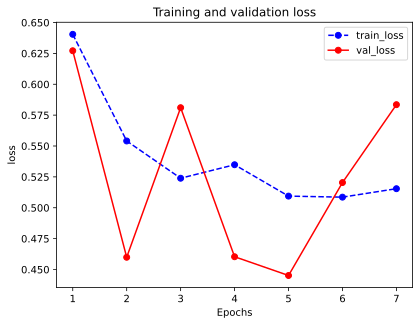

In [47]:
plot_metric(dfhistory, "loss")

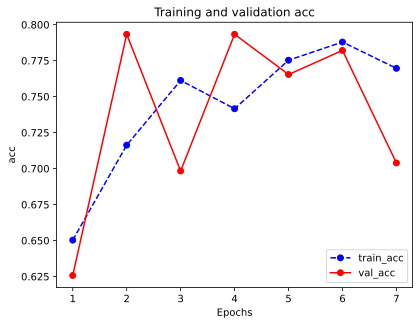

In [48]:
plot_metric(dfhistory, "acc")

### ‰∫îÔºå‰ΩøÁî®Ê®°Âûã

In [49]:
# ‰ΩøÁî®Á•ûÁªèÁΩëÁªúËøõË°åÊé®Êñ≠ÔºåËÆ°ÁÆóÂâç10‰∏™Ê†∑Êú¨ÁöÑÈ¢ÑÊµãÊ¶ÇÁéá
# ‰ΩøÁî® torch.sigmoid ÂáΩÊï∞Â∞ÜÊ®°ÂûãËæìÂá∫ÁöÑ logits ËΩ¨Êç¢‰∏∫Ê¶ÇÁéáÂÄº

y_pred_probs = torch.sigmoid(
    net(torch.tensor(x_test[0:10]).float())  # Â∞ÜÂâç10‰∏™ÊµãËØïÊ†∑Êú¨ËΩ¨Êç¢‰∏∫ PyTorch Âº†ÈáèÂπ∂ËøõË°åÊé®Êñ≠
).data

# ËæìÂá∫È¢ÑÊµãÊ¶ÇÁéáÂÄº
y_pred_probs


tensor([[0.0890],
        [0.4536],
        [0.3001],
        [0.3704],
        [0.5463],
        [0.5544],
        [0.0763],
        [0.5896],
        [0.2655],
        [0.1236]])

In [50]:
# È¢ÑÊµãÁ±ªÂà´
# Â¶ÇÊûúÈ¢ÑÊµãÁöÑÊ¶ÇÁéáÂÄºÂ§ß‰∫é0.5ÔºåÂàôÂ∞ÜÁ±ªÂà´ËÆæÁΩÆ‰∏∫1ÔºåÂê¶ÂàôËÆæÁΩÆ‰∏∫0

# ‰ΩøÁî® torch.where ÂáΩÊï∞ËøõË°åÁ±ªÂà´ÁöÑÂà§ÂÆö
y_pred = torch.where(
    y_pred_probs > 0.5,  # È¢ÑÊµãÊ¶ÇÁéáÂÄºÂ§ß‰∫é0.5Êó∂Ôºå‰∏∫Ê≠£Á±ªÂà´
    torch.ones_like(y_pred_probs),  # Ê≠£Á±ªÂà´Ê†áÁ≠æÔºà1Ôºâ
    torch.zeros_like(y_pred_probs)  # Ë¥üÁ±ªÂà´Ê†áÁ≠æÔºà0Ôºâ
)

# ËæìÂá∫È¢ÑÊµãÁöÑÁ±ªÂà´
y_pred


tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.]])

### ÂÖ≠Ôºå‰øùÂ≠òÊ®°Âûã

Pytorch Êúâ‰∏§Áßç‰øùÂ≠òÊ®°ÂûãÁöÑÊñπÂºèÔºåÈÉΩÊòØÈÄöËøáË∞ÉÁî®pickleÂ∫èÂàóÂåñÊñπÊ≥ïÂÆûÁé∞ÁöÑ„ÄÇ

Á¨¨‰∏ÄÁßçÊñπÊ≥ïÂè™‰øùÂ≠òÊ®°ÂûãÂèÇÊï∞„ÄÇ

Á¨¨‰∫åÁßçÊñπÊ≥ï‰øùÂ≠òÂÆåÊï¥Ê®°Âûã„ÄÇ

Êé®Ëçê‰ΩøÁî®Á¨¨‰∏ÄÁßçÔºåÁ¨¨‰∫åÁßçÊñπÊ≥ïÂèØËÉΩÂú®ÂàáÊç¢ËÆæÂ§áÂíåÁõÆÂΩïÁöÑÊó∂ÂÄôÂá∫Áé∞ÂêÑÁßçÈóÆÈ¢ò„ÄÇ


**1Ôºå‰øùÂ≠òÊ®°ÂûãÂèÇÊï∞(Êé®Ëçê)**

In [51]:
# ÊâìÂç∞Á•ûÁªèÁΩëÁªúÊ®°ÂûãÁöÑÁä∂ÊÄÅÂ≠óÂÖ∏‰∏≠ÁöÑÊâÄÊúâÈîÆ
print(net.state_dict().keys())

odict_keys(['linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias', 'linear3.weight', 'linear3.bias'])


In [52]:
# ‰øùÂ≠òÊ®°ÂûãÂèÇÊï∞Âà∞Êñá‰ª∂ "./data/net_parameter.pt"
torch.save(net.state_dict(), "./data/net_parameter.pt")

# ÂàõÂª∫‰∏Ä‰∏™Êñ∞ÁöÑÁ•ûÁªèÁΩëÁªúÊ®°Âûã net_clone
net_clone = create_net()

# Âä†ËΩΩ‰øùÂ≠òÁöÑÊ®°ÂûãÂèÇÊï∞Âà∞ net_clone
net_clone.load_state_dict(torch.load("./data/net_parameter.pt"))

# ÂØπÂâç10‰∏™ÊµãËØïÊ†∑Êú¨ËøõË°åÊé®Êñ≠Ôºå‰ΩøÁî®Êñ∞ÁöÑÊ®°Âûã net_clone
# ‰ΩøÁî® torch.sigmoid ÂáΩÊï∞Â∞ÜÊ®°ÂûãËæìÂá∫ÁöÑ logits ËΩ¨Êç¢‰∏∫Ê¶ÇÁéáÂÄº
predictions = torch.sigmoid(net_clone.forward(torch.tensor(x_test[0:10]).float())).data

# ËæìÂá∫È¢ÑÊµãÁöÑÊ¶ÇÁéáÂÄº
predictions


tensor([[0.0890],
        [0.4536],
        [0.3001],
        [0.3704],
        [0.5463],
        [0.5544],
        [0.0763],
        [0.5896],
        [0.2655],
        [0.1236]])

**2Ôºå‰øùÂ≠òÂÆåÊï¥Ê®°Âûã(‰∏çÊé®Ëçê)**

In [53]:
# ‰øùÂ≠òÊï¥‰∏™Á•ûÁªèÁΩëÁªúÊ®°ÂûãÂà∞Êñá‰ª∂ "./data/net_model.pt"
torch.save(net, './data/net_model.pt')

# Âä†ËΩΩÊï¥‰∏™Á•ûÁªèÁΩëÁªúÊ®°Âûã
net_loaded = torch.load('./data/net_model.pt')

# ÂØπÂâç10‰∏™ÊµãËØïÊ†∑Êú¨ËøõË°åÊé®Êñ≠Ôºå‰ΩøÁî®Âä†ËΩΩÁöÑÊ®°Âûã net_loaded
# ‰ΩøÁî® torch.sigmoid ÂáΩÊï∞Â∞ÜÊ®°ÂûãËæìÂá∫ÁöÑ logits ËΩ¨Êç¢‰∏∫Ê¶ÇÁéáÂÄº
predictions = torch.sigmoid(net_loaded(torch.tensor(x_test[0:10]).float())).data

# ËæìÂá∫È¢ÑÊµãÁöÑÊ¶ÇÁéáÂÄº
predictions


tensor([[0.0890],
        [0.4536],
        [0.3001],
        [0.3704],
        [0.5463],
        [0.5544],
        [0.0763],
        [0.5896],
        [0.2655],
        [0.1236]])

**Â¶ÇÊûúÊú¨‰π¶ÂØπ‰Ω†ÊúâÊâÄÂ∏ÆÂä©ÔºåÊÉ≥ÈºìÂä±‰∏Ä‰∏ã‰ΩúËÄÖÔºåËÆ∞ÂæóÁªôÊú¨È°πÁõÆÂä†‰∏ÄÈ¢óÊòüÊòüstar‚≠êÔ∏èÔºåÂπ∂ÂàÜ‰∫´Áªô‰Ω†ÁöÑÊúãÂèã‰ª¨Âñîüòä!** 

Â¶ÇÊûúÂØπÊú¨‰π¶ÂÜÖÂÆπÁêÜËß£‰∏äÊúâÈúÄË¶ÅËøõ‰∏ÄÊ≠•Âíå‰ΩúËÄÖ‰∫§ÊµÅÁöÑÂú∞ÊñπÔºåÊ¨¢ËøéÂú®ÂÖ¨‰ºóÂè∑"ÁÆóÊ≥ïÁæéÈ£üÂ±ã"‰∏ãÁïôË®Ä„ÄÇ‰ΩúËÄÖÊó∂Èó¥ÂíåÁ≤æÂäõÊúâÈôêÔºå‰ºöÈÖåÊÉÖ‰∫à‰ª•ÂõûÂ§ç„ÄÇ

‰πüÂèØ‰ª•Âú®ÂÖ¨‰ºóÂè∑ÂêéÂè∞ÂõûÂ§çÂÖ≥ÈîÆÂ≠óÔºö**Âä†Áæ§**ÔºåÂä†ÂÖ•ËØªËÄÖ‰∫§ÊµÅÁæ§ÂíåÂ§ßÂÆ∂ËÆ®ËÆ∫„ÄÇ

![ÁÆóÊ≥ïÁæéÈ£üÂ±ãlogo.png](https://tva1.sinaimg.cn/large/e6c9d24egy1h41m2zugguj20k00b9q46.jpg)